# Loading Libraries and Algorithms

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl #https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
import numpy as np
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# Importing the Data

In [2]:
training_raw = pd.read_csv("./Data/trainingData.csv")
validation_raw = pd.read_csv("./Data/validationData.csv")

Initial Data Exploration

In [3]:
training_raw.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
training_raw.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [5]:
# Check missing values
training_raw.isnull().any().sum()
validation_raw.isnull().any().sum()

0

## Data Exploration

## Floor and Building Distribution

In [6]:
training_raw.FLOOR = training_raw.FLOOR.astype('category')
training_raw.BUILDINGID = training_raw.BUILDINGID.astype('category')
training_raw[['FLOOR', 'BUILDINGID']].describe()

,FLOOR,BUILDINGID
count,19937,19937
unique,5,3
top,3,2
freq,5048,9492


In [7]:
validation_raw.FLOOR = validation_raw.FLOOR.astype('category')
validation_raw.BUILDINGID = validation_raw.BUILDINGID.astype('category')
training_raw[['FLOOR', 'BUILDINGID']].describe()

,FLOOR,BUILDINGID
count,19937,19937
unique,5,3
top,3,2
freq,5048,9492


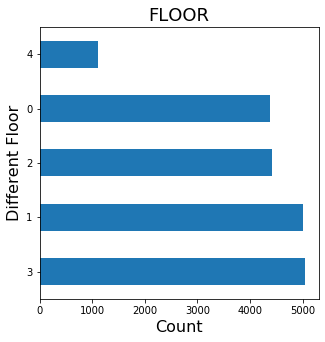

In [8]:
FLOOR_count = training_raw.FLOOR.value_counts()
FLOOR_count

FLOOR_count.plot(kind='barh', figsize=(5,5))
plt.title('FLOOR', fontsize=18)
plt.ylabel('Different Floor', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show() #We don't want to stack the plot with the next one

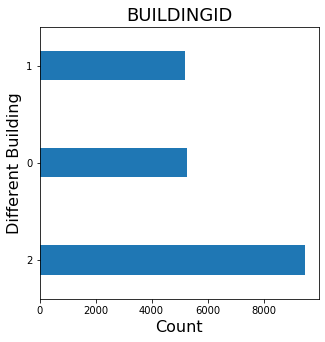

In [9]:
BUILDINGID_count = training_raw.BUILDINGID.value_counts()

BUILDINGID_count.plot(kind='barh', figsize=(5,5), width = 0.3)
plt.title('BUILDINGID', fontsize=18)
plt.ylabel('Different Building', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

- There is a clear class imbalance in the Building counts, resample may be needed.
- There is another class imbalance in the Floor distribution, we must check if this comes from a single building that has a 4 Floor

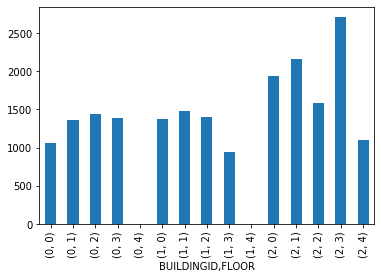

In [10]:
training_raw.groupby(['BUILDINGID','FLOOR']).size().plot(kind="bar")
#Only one of the buildings has a 4th floor

## Checking the Observations Distribution

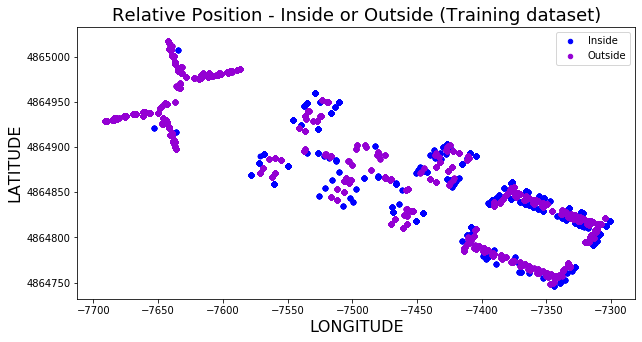

In [11]:
# Create subset for inside and outside
Pos01_in_train = training_raw[training_raw['RELATIVEPOSITION'] == 1]
Pos02_out_train = training_raw[training_raw['RELATIVEPOSITION'] == 2]

ax1 = Pos01_in_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Inside',
                    color='blue',
                    figsize=(10,5))
ax2 = Pos02_out_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Outside',
                    color="darkviolet",
                    figsize=(10,5),
                    ax=ax1)

plt.title('Relative Position - Inside or Outside (Training dataset)', fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)
plt.legend(loc='best')
plt.show()

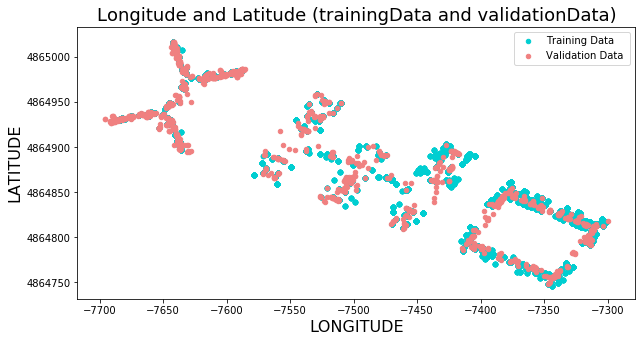

In [12]:
#CHECKING DISTRIBUTIONS OF THE TRAINING AND VALIDATIONS

ax1 = training_raw.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Training Data ',
                    color="darkturquoise",
                    figsize=(10,5))
ax2 = validation_raw.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Validation Data ',
                    color="lightcoral",
                    figsize=(10,5),
                    ax=ax1)

plt.title("Longitude and Latitude (trainingData and validationData)", fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)
plt.legend(loc='best')

plt.show()

## Checking WAPS distribution

In [13]:
#Counting the number of ocurrences different to 100 (which is no signal)
# Training Data
training_raw['WAP_COUNT'] = training_raw[training_raw.iloc[:,0:520] != 100 ].count(axis=1)
#If 1 or columns counts are generated for each row. Also: axis='columns'
training_raw.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0


In [14]:
# Test Data
validation_raw['WAP_COUNT'] = validation_raw[validation_raw.iloc[:,:-9] != 100 ].count(axis=1)
validation_raw.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,14


In [15]:
# BUILDING SUBSETTING FOR CHECKING DISTRIBUTION

# Training Data
Build00_train = training_raw[training_raw['BUILDINGID'] == 0]
Build01_train = training_raw[training_raw['BUILDINGID'] == 1]
Build02_train = training_raw[training_raw['BUILDINGID'] == 2]
# Test Data
Build00_valid = validation_raw[validation_raw['BUILDINGID'] == 0]
Build01_valid = validation_raw[validation_raw['BUILDINGID'] == 1]
Build02_valid = validation_raw[validation_raw['BUILDINGID'] == 2]

#WAP counts per building - Training Data

Building_WAP_train = pd.DataFrame({'Building 00': Build00_train['WAP_COUNT'],
                                   'Building 01': Build01_train['WAP_COUNT'],
                                   'Building 02': Build02_train['WAP_COUNT']},
                                  columns=['Building 00',
                                           'Building 01',
                                           'Building 02'])

Building_WAP_train.head()
#Not all the buildings have observations from all the WAPS

,Building 00,Building 01,Building 02
0,NaN,17.0,NaN
1,NaN,16.0,NaN
2,NaN,15.0,NaN
3,NaN,16.0,NaN
4,0.0,NaN,NaN


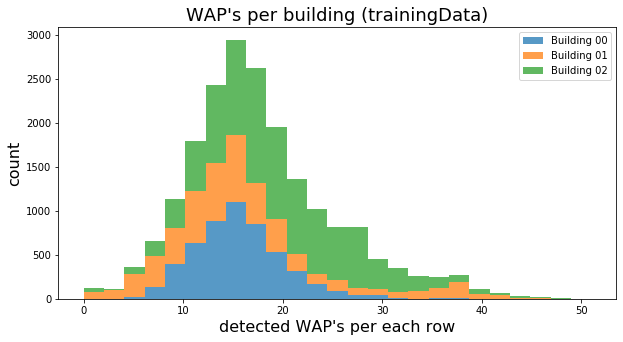

In [16]:
Building_WAP_train.plot.hist(stacked=True,
               figsize=(10,5),
               alpha=0.75,
               bins=25)

plt.title("WAP's per building (trainingData)", fontsize=18)
plt.xlabel("detected WAP's per each row" , fontsize=16)
plt.ylabel('count', fontsize=16)
plt.legend(loc='best')

plt.show()

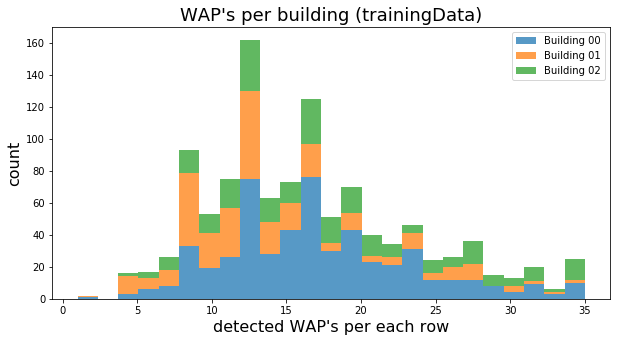

In [17]:
#WAP counts per building - Validation Data

Building_WAP_valid = pd.DataFrame({'Building 00': Build00_valid['WAP_COUNT'],
                                   'Building 01': Build01_valid['WAP_COUNT'],
                                   'Building 02': Build02_valid['WAP_COUNT']},
                                  columns=['Building 00',
                                           'Building 01',
                                           'Building 02'])

Building_WAP_valid.plot.hist(stacked=True,
               figsize=(10,5),
               alpha=0.75,
               bins=25)

plt.title("WAP's per building (trainingData)", fontsize=18)
plt.xlabel("detected WAP's per each row" , fontsize=16)
plt.ylabel('count', fontsize=16)
plt.legend(loc='best')

plt.show()

# Pre-processing

**There are several things that will be adressed in the pre-processing part:**
- The WAPS and the observations that are alway 100 (no detection) will be removed
- Duplicated will be removed
- Downsampling will be performed to balance the building observations
- Near zero variance WAPS will be removed (they always detect the same area)
- Outliers will be analyzed and removed
- Data will be re-scaled to positive numbers
- Normalization over the rows is performed
- Principal component analysis is done with the objective of minimize the computing time

**Notes:**

- WAPS are measured in RSSI (dBm), which is a logarithm scale. Power transformation to mW was tried, following the next equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$P(mW)=1mW*10^{P(dBm)/10}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, the results were not as expected, and it was not included in this report. More info:
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(https://iotandelectronics.wordpress.com/2016/10/07/how-to-calculate-distance-from-the-rssi-value-of-the-ble-beacon/)
- Due to the high skewness of the WAPS, it os logical to thing that a method that normalization and standarization is not optimum, since it affects to outliers. Therefore, minmaxscaler function was tested. However, normalization yielded better results

In [ ]:
#For the final TEST SET WE WILL DO THIS:
# Select 80% of the validation data and add to training to enrich training data
#val_80 = val.sample(frac = 0.80, random_state = 0)
#train = train.append(val_80)

# Remove that 80% from the validation data
#val = pd.concat([val, val_80]).drop_duplicates(keep=False)

# Reset index for both data frames
#train.reset_index(drop = True, inplace = True)
#val.reset_index(drop = True, inplace = True)

## WAPS 100 removal 

In [4]:
validation_clean = validation_raw.copy()

# Identification of the WAP columns with only 100 Signal Strengh 

# Training dataset
train_column_select = np.sum(training_raw, axis=0) #Iterating over the columns
train_column_select = train_column_select[train_column_select == 1993700]
#If all the rows have 100, the 19937 rows will be this value
print("Columns with only 100 WAPS (Training):", train_column_select.count())

# Test dataset
valid_column_select = np.sum(validation_raw,axis=0)
valid_column_select = valid_column_select[valid_column_select == 111100]
print("Columns with only 100 WAPS (Validation):", valid_column_select.count())

# Training dataset
train_row_select = training_raw.iloc[:,0:520]
train_row_select = np.sum(train_row_select, axis=1)
train_row_select = train_row_select[train_row_select == 52000]
print ('Rows with only 100 WAPS (Training):', train_row_select.count())

# Test dataset
valid_row_select = validation_raw.iloc[:,0:520]
valid_row_select = np.sum(valid_row_select, axis=1)
valid_row_select = valid_row_select[valid_row_select == 52000]
print ('Rows with only 100 WAPS (Validation):', valid_row_select.count())

# Remove the columns

# Training dataset
training_clean = training_raw[training_raw.columns[training_raw.sum() != 1993700]]
print("After column removal:", training_clean.shape)
#After the downsampling, this is not needed

# Remove the rows

# Training dataset
training_clean.columns.get_loc("LONGITUDE")
training_row_cleaning = training_clean.iloc[:,0:465]
training_row_cleaning['rows'] = np.sum(training_row_cleaning, axis=1)
training_clean = training_clean.drop(training_clean.index[training_row_cleaning.rows == 46500]) #Without the inplace the order will not be effective
print("After row removal:", training_clean.shape)


Columns with only 100 WAPS (Training): 55
Columns with only 100 WAPS (Validation): 153
Rows with only 100 WAPS (Training): 76
Rows with only 100 WAPS (Validation): 0
After column removal: (19937, 474)
After row removal: (19861, 474)


## Remove duplicates

In [5]:
# %% REMOVE DUPLICATE ROWS

# Training dataset
training_clean = training_clean.drop_duplicates()

# Test dataset
validation_clean = validation_clean.drop_duplicates()

print("After duplicates removal:", training_clean.shape)

After duplicates removal: (19227, 474)


## Downsampling

Before Downsampling


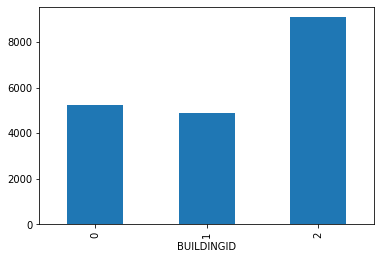

After Downsampling


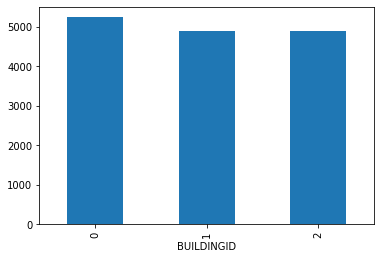

In [6]:
# %% DOWNSAMPLING BUILDING ON TRAINING SET

training_clean.groupby("BUILDINGID").size().plot(
    kind="bar")  # We still have downsampling
print("Before Downsampling")
plt.show()
# Size of the Building with lowest obervations
sample_size = training_clean.groupby("BUILDINGID").size().min()

# Building subsettting
Build00_train = training_clean[training_clean['BUILDINGID'] == 0]
Build01_train = training_clean[training_clean['BUILDINGID'] == 1]
Build02_train = training_clean[training_clean['BUILDINGID'] == 2]

# Downsample the building with most observations
Build02_downsampled = resample(Build02_train, replace=False, n_samples=sample_size,
                               random_state=3)

# Reagrupate the data
training_downsample = pd.concat(
    [Build00_train, Build01_train, Build02_downsampled])
# Verify
print("After Downsampling")
training_downsample.groupby("BUILDINGID").size().plot(kind="bar")
plt.show()

## Remove low variance WAPS

In [7]:
#%% VARIANCE OF THE WAPS

training_clean=training_downsample.copy()
print("Before Removing low variance WAPS:", training_clean.shape)
# Training dataset
COLUMN_NAMES=[]
train_var = pd.DataFrame(columns=COLUMN_NAMES)
train_var['variance'] = training_clean.var(axis=0)
train_var.describe()
#train_var.drop(train_var.index[465:476], inplace=True)

# Transpose the column with row

# Training dataset
train_var_trans = train_var.T
train_var_trans.dtypes
train_var_trans = train_var_trans.astype('int')

#Set variance threshold (less than 20 - it give us Boolean) 
#and combine it with the main dataset

train_var_trans = train_var_trans.iloc[-1:,:] < 10 
#Iterate over the last row of the dataframe
#If I do not put the last ",:" I get a series (row form data set)
#Moreover, if I put the row name variance it does not work

train_combine= pd.concat([train_var_trans, training_clean]) #With this appear as the first
#train_combine_test2 = training_clean.append(train_var_trans) #With this appear at the end

#Replace all 1 with NaN
train_combine.columns.get_loc("LONGITUDE") #475-465
train_combine.iloc[:,:-10] = train_combine.replace(to_replace=1, value=np.nan)

#Remove all column with NaN
train_combine.dropna(axis=1, inplace = True)

#Remove row variance
train_combine = train_combine.drop(train_combine.index[0])

#Cleaned data asigment
train_clean = train_combine.copy()
print("After Removing low variance WAPS:", train_clean.shape)


Before Removing low variance WAPS: (15053, 474)
After Removing low variance WAPS: (15053, 417)


In [8]:
#%% TIMESTAMP
#The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch 
#on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular 
#date and the Unix Epoch

train_clean['TIMESTAMP'] = pd.to_datetime(train_clean['TIMESTAMP'], unit='s')
train_clean.TIMESTAMP

# Test dataset
validation_clean['TIMESTAMP'] = pd.to_datetime(validation_clean['TIMESTAMP'], unit='s')
validation_clean.TIMESTAMP


0      2013-10-04 07:45:03
1      2013-10-07 14:10:54
2      2013-10-07 14:11:35
3      2013-10-07 14:12:18
4      2013-10-04 09:09:34
               ...        
1106   2013-10-07 14:38:31
1107   2013-10-07 14:38:50
1108   2013-10-08 15:56:21
1109   2013-10-08 15:56:47
1110   2013-10-08 15:57:16
Name: TIMESTAMP, Length: 1111, dtype: datetime64[ns]

### Data splitting before data transformation

In [26]:
train_clean.head

<bound method NDFrame.head of        WAP001  WAP002  WAP005  WAP006  WAP007  WAP008  WAP009  WAP010  WAP011  \
7119      100     100     100     100     100     100     100     100     100   
7120      100     100     100     100     100     100     100     100     100   
7121      100     100     100     100     100     100     100     100     100   
7122      100     100     100     100     100     100     100     100     100   
7123      100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19145     100     100     100     100     100     100     100     100     100   
14216     100     100     100     100     100     100     100     100     100   
14922     100     100     100     100     100     100     100     100     100   
15421     100     100     100     100     100     100     100     100     100   
19253     100     100     100     100     100     100     100     100     100  

In [9]:

#FROM NOW ON, THE DATA WILL REALLY CHANGE, EVERYTHING WILL NEED TO BE APPLIED TO THE TEST DATASET

#Independent variables
X_train = train_clean.iloc[:,:-9] #iloc is index location i.e. row number #get all rows for columns until 520
X_validation = validation_clean.iloc[:,:-9] 

#To ensure to have the same columns!!!!!
X_validation = X_validation[X_train.columns]

#Dependent variables
Y_train = train_clean.iloc[:,-9:len(train_clean)]
Y_validation = validation_clean.iloc[:,-9:len(train_clean)]

Y_validation

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7515.916799,4.864890e+06,1,1,0,0,0,0,2013-10-04 07:45:03
1,-7383.867221,4.864840e+06,4,2,0,0,0,13,2013-10-07 14:10:54
2,-7374.302080,4.864847e+06,4,2,0,0,0,13,2013-10-07 14:11:35
3,-7365.824883,4.864843e+06,4,2,0,0,0,13,2013-10-07 14:12:18
4,-7641.499303,4.864922e+06,2,0,0,0,0,2,2013-10-04 09:09:34
...,...,...,...,...,...,...,...,...,...
1106,-7317.344231,4.864796e+06,3,2,0,0,0,13,2013-10-07 14:38:31
1107,-7313.731120,4.864792e+06,3,2,0,0,0,13,2013-10-07 14:38:50
1108,-7637.535798,4.864903e+06,0,0,0,0,0,13,2013-10-08 15:56:21
1109,-7636.654005,4.864905e+06,0,0,0,0,0,13,2013-10-08 15:56:47


In [12]:
#Remove unnecessary colums

# Training dataset
y_training = Y_train.drop(['SPACEID', 'RELATIVEPOSITION', 
                                'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)

# Test dataset
y_validation = Y_validation.drop(['SPACEID', 'RELATIVEPOSITION',
                                    'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)

y_training.FLOOR = y_training.FLOOR.astype('category')
y_training.BUILDINGID = y_training.BUILDINGID.astype('category')

y_validation.FLOOR = y_validation.FLOOR.astype('category')
y_validation.BUILDINGID = y_validation.BUILDINGID.astype('category')

y_training

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
7119,-7637.257000,4.864950e+06,0,0
7120,-7628.134500,4.864977e+06,0,0
7121,-7622.054600,4.864976e+06,0,0
7122,-7636.205700,4.864967e+06,0,0
7123,-7633.729500,4.864965e+06,0,0
...,...,...,...,...
19145,-7323.550654,4.864828e+06,1,2
14216,-7314.132500,4.864817e+06,2,2
14922,-7349.546000,4.864836e+06,1,2
15421,-7353.723400,4.864834e+06,1,2


## Checking Outliers

According to:
https://support.randomsolutions.nl/827069-Best-dBm-Values-for-Wifi
https://www.metageek.com/training/resources/understanding-rssi.html

The maximum achievable real strength corresponds to -30dBm, while the optimum signal corresponds to the range -40 and -60 dBm. We are going to check the distribution of signals of the WAP to obsever how the range between -30 and 0 dBm behaves.

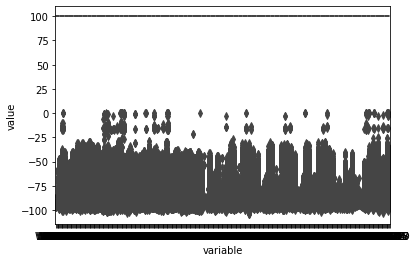

In [10]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_train))

From the distribution observed, it seems clear that the values above -30dBm are unusual, therefore, we will consider them as outliers and remove them

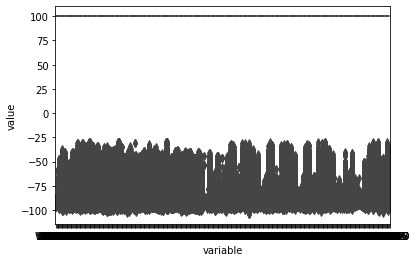

In [13]:
#%% CHECKING OUTLIERS

#Reset the index to avoid possible problems
X_train.reset_index(drop = True, inplace = True)
y_training.reset_index(drop = True, inplace = True)

#Find the index where we have the outliers
index_outliers = X_train[(X_train.iloc[:,:].values > -30) & (X_train.iloc[:,:].values <= 0)].index
#Drop the observations of the outliers
X_train = X_train.drop(X_train.index[index_outliers])
#Drop the observation also in the Y_training
y_training = Y_train.drop(Y_train.index[index_outliers])

sns.boxplot(x="variable", y="value", data=pd.melt(X_train))

## Data re-scaling

In [14]:
#%% CHANGING WAP SCALE

X_train_scale = np.where(X_train <= 0, #If it is lower than 0
                                     X_train + 105, #Sum 105
                                     X_train - 100) #Otherwise, substract 100

X_train_scale_df = pd.DataFrame(X_train_scale, columns = X_train.columns)

X_validation_scale = np.where(X_validation <= 0, #If it is lower than 0
                                     X_validation + 105, #Sum 105
                                     X_validation - 100) #Otherwise, substract 100

X_validation_scale_df = pd.DataFrame(X_validation_scale, columns = X_validation.columns)


## Dimensionality Reduction

In [15]:
#%%DIMENSIONALITY REDUCTION

#l2 normalization over rows
normalizer = Normalizer()

X_norm_train = normalizer.fit_transform(X_train_scale_df)
X_norm_validation= normalizer.fit_transform(X_validation_scale_df)

## Principal Component Analysis

Before PCA: (14796, 408)
After PCA: (14796, 189)


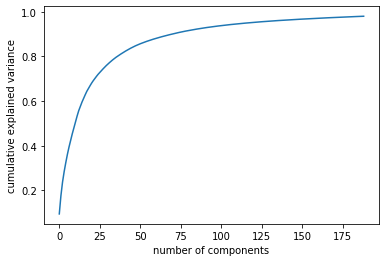

In [16]:
#PCA reduces the dimensionality of the dataset to a handful of variables
print("Before PCA:", X_norm_train.shape)
pca = PCA(.98) #98% of the variance is retained.
pca.fit(X_norm_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


X_train_pca = pca.transform(X_norm_train)
X_validation_pca = pca.transform(X_norm_validation)
print("After PCA:", X_train_pca.shape)

#Variable renaming
X_training=X_train_pca.copy()
X_validation=X_validation_pca.copy()

# Modelling

- Different models were tried with the final data, including KNN, Random Forest, SVM, Logistic Regressiong and ....
- The models were optimized throughotu RandomizedSearchSV.
- The best models were used to make predictions over the Validation Dataset, and their metrics and error analysis will be subsequently showed.


## Algorithms for the models

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

## KNN

In [65]:
#%% DEFINE THE PARAMETER GRID FOR GRID SEARCH CV

random_grid = {'n_neighbors': np.arange(2, 8)}

In [68]:
#%% KNN LOOP FOR ALL VARIABLES

#Variable renaming
X_training=X_train_pca.copy()
X_validation=X_validation_pca.copy()

#Be carefull with these functions, they work with df and no with arrays
# Create function that selects output variables
def get_y_var(df, y_list):
    return df[y_list]

# Create function that selects input variables
def get_x_var(df, x_list):
    return df[x_list]

# Initialize data frame and library that will be used 
accuracy = {}
kappa = {}
conf_matrix_KNN = {}
class_report_KNN= {}
metrics_classification_KNN = [accuracy, kappa]
mse = {}
mae = {}
r2 = {}
rmse ={}
metrics_regression_KNN = [mse, mae, r2, rmse]
best_parameters_KNN = {}

# Prediction log
predictions_KNN = pd.DataFrame()

# Select all variables that need prediction
pred_var = ["LONGITUDE", 
            "LATITUDE", 
            "FLOOR", 
            "BUILDINGID"]

# Select all variables that need regression
reg_labels = ["LONGITUDE", 
              "LATITUDE"]

# Loop over the predictor variables
for i in pred_var:
    # If i is label that requires regression, run regression else classification
    if i in reg_labels:
        # Select label you want to predict from train
        training_y_reg = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_reg = get_y_var(y_validation, i)        
        # Initiate regressor
        knn = KNeighborsRegressor()
        #Grid Search CV
        knn_random = GridSearchCV(estimator = knn, param_grid=random_grid, cv=3)
        # Fit model with the best RF found
        knn_random.fit(X_training, training_y_reg)
        # Predict values for validation data
        pred = knn_random.predict(X_validation) 
        # Write prediction to pred_
        predictions_KNN[i] = pred        
        # Estimate mse, mea, r^2 and write to library for relevant i
        mse[i] = mean_squared_error(validation_y_reg, pred)
        mae[i] = mean_absolute_error(validation_y_reg, pred)
        r2[i] = r2_score(validation_y_reg, pred)
        rmse[i] = sqrt(mean_squared_error(validation_y_reg, pred))
        #Store the best parameters
        best_parameters_KNN[i]=knn_random.best_params_
        
    else:
        # Select label you want to predict from train
        training_y_clf = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_clf = get_y_var(y_validation, i)        
        # Initiate classifier
        knn = KNeighborsClassifier()
        #Grid Search CV
        knn_random = GridSearchCV(estimator = knn, param_grid=random_grid, cv=3)
        # Fit model with the best RF found
        knn_random.fit(X_training, training_y_clf)
        # Predict values for validation data
        pred = knn_random.predict(X_validation) 
        # Write prediction to pred_log
        predictions_KNN[i] = pred        
        # Estimate accuracy,kappa and confussion matrix and write to library for relevant i
        accuracy[i] = accuracy_score(validation_y_clf, pred)
        kappa[i] = cohen_kappa_score(validation_y_clf, pred)
        conf_matrix_KNN[i] = confusion_matrix(validation_y_clf, pred)
        class_report_KNN[i]=classification_report(validation_y_clf, pred)
        #Store the best parameters
        best_parameters_KNN[i]=knn_random.best_params_
    

metrics_regression_KNN = pd.DataFrame(metrics_regression_KNN, index=["mse", "mae", "r2", "rmse"])
metrics_classification_KNN = pd.DataFrame(metrics_classification_KNN, index=["accuracy", "kappa"])

### KNN Results

In [69]:
metrics_regression_KNN

,LONGITUDE,LATITUDE
mse,62.881616,51.062183
mae,5.105850,4.581345
r2,0.995644,0.989651
rmse,7.929793,7.145781


In [70]:
metrics_classification_KNN

,FLOOR,BUILDINGID
accuracy,0.936094,1.0
kappa,0.910386,1.0


In [71]:
best_parameters_KNN

{'LONGITUDE': {'n_neighbors': 6},
 'LATITUDE': {'n_neighbors': 7},
 'FLOOR': {'n_neighbors': 2},
 'BUILDINGID': {'n_neighbors': 6}}

In [80]:
print(conf_matrix_KNN['FLOOR'])

[[119   8   5   0   0]
 [  6 428  28   0   0]
 [  2   5 294   5   0]
 [  0   0   6 166   0]
 [  1   0   0   5  33]]


In [81]:
print(conf_matrix_KNN['BUILDINGID'])

[[536   0   0]
 [  0 307   0]
 [  0   0 268]]


In [79]:
print(class_report_KNN['FLOOR'])

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       132
           1       0.97      0.93      0.95       462
           2       0.88      0.96      0.92       306
           3       0.94      0.97      0.95       172
           4       1.00      0.85      0.92        39

    accuracy                           0.94      1111
   macro avg       0.95      0.92      0.93      1111
weighted avg       0.94      0.94      0.94      1111



In [83]:
print(class_report_KNN['BUILDINGID'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



## Random Forest

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
random_grid = {'n_estimators': n_estimators}

In [28]:
#%% RANDOM FOREST LOOP FOR ALL VARIABLES

#Be carefull with these functions, they work with df and no with arrays
# Create function that selects output variables
def get_y_var(df, y_list):
    return df[y_list]

# Create function that selects input variables
def get_x_var(df, x_list):
    return df[x_list]

# Initialize data frame and library that will be used 
accuracy = {}
kappa = {}
conf_matrix_RF = {}
class_report_RF = {}
metrics_classification_RF = [accuracy, kappa]
mse = {}
mae = {}
r2 = {}
rmse ={}
metrics_regression_RF = [mse, mae, r2, rmse]
best_parameters_RF = {}

# Prediction log
predictions_RF = pd.DataFrame()

# Select all variables that need prediction
pred_var = ["LONGITUDE", 
            "LATITUDE", 
            "FLOOR", 
            "BUILDINGID"]

# Select all variables that need regression
reg_labels = ["LONGITUDE", 
              "LATITUDE"]

# Loop over the predictor variables
for i in pred_var:
    # If i is label that requires regression, run regression else classification
    if i in reg_labels:
        # Select label you want to predict from train
        training_y_reg = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_reg = get_y_var(y_validation, i)        
        # Initiate regressor
        rf = RandomForestRegressor()
        #Grid Search CV
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 3, verbose=2, random_state=42, n_jobs = -1)
            #The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively).
        # Fit model with the best RF found
        rf_random.fit(X_training, training_y_reg)
        # Predict values for validation data
        pred = rf_random.predict(X_validation) 
        # Write prediction to pred_
        predictions_RF[i] = pred        
        # Estimate mse, mea, r^2 and write to library for relevant i
        mse[i] = mean_squared_error(validation_y_reg, pred)
        mae[i] = mean_absolute_error(validation_y_reg, pred)
        r2[i] = r2_score(validation_y_reg, pred)
        rmse[i] = sqrt(mean_squared_error(validation_y_reg, pred))
        #Store the best parameters
        best_parameters_RF[i]=rf_random.best_params_
        
    else:
        # Select label you want to predict from train
        training_y_clf = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_clf = get_y_var(y_validation, i)        
        # Initiate classifier
        rf = RandomForestClassifier()
        #Grid Search CV
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 3, verbose=2, random_state=42, n_jobs = -1)
            #The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively).
        # Fit model with the best RF found
        rf_random.fit(X_training, training_y_clf)
        # Predict values for validation data
        pred = rf_random.predict(X_validation) 
        # Write prediction to pred_log
        predictions_RF[i] = pred        
        # Estimate accuracy,kappa and confussion matrix and write to library for relevant i
        accuracy[i] = accuracy_score(validation_y_clf, pred)
        kappa[i] = cohen_kappa_score(validation_y_clf, pred)
        conf_matrix_RF[i] = confusion_matrix(validation_y_clf, pred)
        class_report_RF[i]=classification_report(validation_y_clf, pred)
        #Store the best parameters
        best_parameters_RF[i]=rf_random.best_params_
    

metrics_regression_RF = pd.DataFrame(metrics_regression_RF, index=["mse", "mae", "r2", "rmse"])
metrics_classification_RF = pd.DataFrame(metrics_classification_RF, index=["accuracy", "kappa"])


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed: 68.3min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 89.2min finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed: 63.7min remaining: 15.0min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 91.3min finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  6.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  8.6min finished


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  3.7min remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  5.1min finished


### RF Results

In [30]:
metrics_classification_RF

,FLOOR,BUILDINGID
accuracy,0.927093,1.0
kappa,0.897551,1.0


In [31]:
metrics_regression_RF

,LONGITUDE,LATITUDE
mse,65.661674,68.141890
mae,5.442472,5.330030
r2,0.995452,0.986189
rmse,8.103189,8.254810


In [32]:
best_parameters_RF

{'LONGITUDE': {'n_estimators': 800},
 'LATITUDE': {'n_estimators': 1000},
 'FLOOR': {'n_estimators': 300},
 'BUILDINGID': {'n_estimators': 300}}

## XGBoost

In [28]:
# Parameters tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
learning = [0.1,0.2,0.3,0.4,0.5,0.6]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}


In [31]:
#%% XGBoost LOOP FOR ALL VARIABLES

#Be carefull with these functions, they work with df and no with arrays
# Create function that selects output variables
def get_y_var(df, y_list):
    return df[y_list]

# Create function that selects input variables
def get_x_var(df, x_list):
    return df[x_list]

# Initialize data frame and library that will be used 
accuracy = {}
kappa = {}
conf_matrix_XGB = {}
class_report_XGB = {}
metrics_classification_XGB = [accuracy, kappa]
mse = {}
mae = {}
r2 = {}
rmse ={}
metrics_regression_XGB = [mse, mae, r2, rmse]
best_parameters_XGB = {}

# Prediction log
predictions_XGB = pd.DataFrame()

# Select all variables that need prediction
pred_var = ["LONGITUDE", 
            "LATITUDE", 
            "FLOOR", 
            "BUILDINGID"]

# Select all variables that need regression
reg_labels = ["LONGITUDE", 
              "LATITUDE"]

# Loop over the predictor variables
for i in pred_var:
    # If i is label that requires regression, run regression else classification
    if i in reg_labels:
        # Select label you want to predict from train
        training_y_reg = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_reg = get_y_var(y_validation, i)        
        # Initiate regressor
        xgb = XGBRegressor()
        #Grid Search CV
        xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
        # Fit model with the best XGB found
        xgb_random.fit(X_training, training_y_reg, 
              early_stopping_rounds=5, #overfitting prevention, stop early if no improvement in learning
              eval_set=[(X_validation, validation_y_reg)])
        # Predict values for validation data
        pred = xgb_random.predict(X_validation) 
        # Write prediction to pred_
        predictions_XGB[i] = pred        
        # Estimate mse, mea, r^2 and write to library for relevant i
        mse[i] = mean_squared_error(validation_y_reg, pred)
        mae[i] = mean_absolute_error(validation_y_reg, pred)
        r2[i] = r2_score(validation_y_reg, pred)
        rmse[i] = sqrt(mean_squared_error(validation_y_reg, pred))
        #Store the best parameters
        best_parameters_XGB[i]=xgb_random.best_params_
        
    else:
        # Select label you want to predict from train
        training_y_clf = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_clf = get_y_var(y_validation, i)        
        # Initiate classifier
        xgb = XGBClassifier()
        #Grid Search CV
        xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
        # Fit model with the best XGB found
        xgb_random.fit(X_training, training_y_clf, 
              early_stopping_rounds=5, #overfitting prevention, stop early if no improvement in learning
              eval_set=[(X_validation, validation_y_clf)])
        pred = xgb_random.predict(X_validation) 
        # Write prediction to pred_log
        predictions_XGB[i] = pred        
        # Estimate accuracy,kappa and confussion matrix and write to library for relevant i
        accuracy[i] = accuracy_score(validation_y_clf, pred)
        kappa[i] = cohen_kappa_score(validation_y_clf, pred)
        conf_matrix_XGB[i] = confusion_matrix(validation_y_clf, pred)
        class_report_XGB[i]=classification_report(validation_y_clf, pred)
        #Store the best parameters
        best_parameters_XGB[i]=xgb_random.best_params_
    

metrics_regression_XGB = pd.DataFrame(metrics_regression_XGB, index=["mse", "mae", "r2", "rmse"])
metrics_classification_XGB = pd.DataFrame(metrics_classification_XGB, index=["accuracy", "kappa"])


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


[14:05:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4519.12
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:2711.17
[2]	validation_0-rmse:1627.38
[3]	validation_0-rmse:977.31
[4]	validation_0-rmse:586.427
[5]	validation_0-rmse:352.073
[6]	validation_0-rmse:211.689
[7]	validation_0-rmse:128.084
[8]	validation_0-rmse:78.2394
[9]	validation_0-rmse:49.3193
[10]	validation_0-rmse:32.2097
[11]	validation_0-rmse:23.4698
[12]	validation_0-rmse:19.0897
[13]	validation_0-rmse:17.2618
[14]	validation_0-rmse:16.3999
[15]	validation_0-rmse:15.8195
[16]	validation_0-rmse:15.503
[17]	validation_0-rmse:15.1936
[18]	validation_0-rmse:15.0239
[19]	validation_0-rmse:14.743
[20]	validation_0-rmse:14.3859
[21]	validation_0-rmse:14.3659
[22]	validation_0-rmse:14.33
[23]	validation_0-rmse:14.323
[24]	validation_0-rmse:14.2878
[25]	validation_0-rmse:14.197
[26]	validation_0-rmse:14.1564


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


[14:07:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.43262e+06
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.2164e+06
[2]	validation_0-rmse:608248
[3]	validation_0-rmse:304151
[4]	validation_0-rmse:152093
[5]	validation_0-rmse:76058.5
[6]	validation_0-rmse:38038.5
[7]	validation_0-rmse:19027.6
[8]	validation_0-rmse:9521.69
[9]	validation_0-rmse:4768.44
[10]	validation_0-rmse:2386.36
[11]	validation_0-rmse:1194.96
[12]	validation_0-rmse:598.721
[13]	validation_0-rmse:299.412
[14]	validation_0-rmse:150.551
[15]	validation_0-rmse:77.3346
[16]	validation_0-rmse:41.1007
[17]	validation_0-rmse:24.7563
[18]	validation_0-rmse:17.8345
[19]	validation_0-rmse:15.5646
[20]	validation_0-rmse:14.7588
[21]	validation_0-rmse:14.4479
[22]	validation_0-rmse:14.2904
[23]	validation_0-rmse:14.18
[24]	validation_0-rmse:14.1897
[25]	validation_0-rmse:13.8994
[26]	validation_0-rmse

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.4min finished


[0]	validation_0-merror:0.288929
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.217822
[2]	validation_0-merror:0.20432
[3]	validation_0-merror:0.19892
[4]	validation_0-merror:0.178218
[5]	validation_0-merror:0.172817
[6]	validation_0-merror:0.168317
[7]	validation_0-merror:0.158416
[8]	validation_0-merror:0.149415
[9]	validation_0-merror:0.141314
[10]	validation_0-merror:0.134113
[11]	validation_0-merror:0.125113
[12]	validation_0-merror:0.125113
[13]	validation_0-merror:0.124212
[14]	validation_0-merror:0.119712
[15]	validation_0-merror:0.118812
[16]	validation_0-merror:0.117012
[17]	validation_0-merror:0.115212
[18]	validation_0-merror:0.107111
[19]	validation_0-merror:0.108911
[20]	validation_0-merror:0.10261
[21]	validation_0-merror:0.10351
[22]	validation_0-merror:0.10081
[23]	validation_0-merror:0.09721
[24]	validation_0-merror:0.09721
[25]	validation_0-merror:0.09901
[26]	validation_0-merror:0.09721
[27]	validation_0-merror:0.09811
[2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.8s finished


[0]	validation_0-merror:0.0027
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.0027
[2]	validation_0-merror:0.0027
[3]	validation_0-merror:0.0027
[4]	validation_0-merror:0.0027
[5]	validation_0-merror:0.0027
Stopping. Best iteration:
[0]	validation_0-merror:0.0027



### XGBoost Results

In [34]:
metrics_regression_XGB

,LONGITUDE,LATITUDE
mse,161.307949,127.100904
mae,8.553476,7.992346
r2,0.988827,0.974239
rmse,12.700707,11.273904


In [32]:
metrics_classification_XGB

,FLOOR,BUILDINGID
accuracy,0.90279,0.997300
kappa,0.86387,0.995737


In [33]:
best_parameters_XGB

{'LONGITUDE': {'n_estimators': 1100, 'learning_rate': 0.4},
 'LATITUDE': {'n_estimators': 1100, 'learning_rate': 0.5},
 'FLOOR': {'n_estimators': 1100, 'learning_rate': 0.4},
 'BUILDINGID': {'n_estimators': 800, 'learning_rate': 0.2}}

## SVM

In [35]:
#%% DEFINE THE PARAMETER GRID FOR GRID SEARCH CV

#For SVM the hyperparameters should be in exponential scale

random_grid_SVR= {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['rbf', 'linear', 'poly']}

random_grid_SVC= {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['rbf', 'linear', 'poly']}

In [36]:
#%% SVM LOOP FOR ALL VARIABLES

#Be carefull with these functions, they work with df and no with arrays
# Create function that selects output variables
def get_y_var(df, y_list):
    return df[y_list]

# Create function that selects input variables
def get_x_var(df, x_list):
    return df[x_list]

# Initialize data frame and library that will be used 
accuracy = {}
kappa = {}
conf_matrix_SVM = {}
class_report_SVM = {}
metrics_classification_SVM = [accuracy, kappa]
mse = {}
mae = {}
r2 = {}
rmse ={}
metrics_regression_SVM = [mse, mae, r2, rmse]
best_parameters_SVM = {}

# Prediction log
predictions_SVM = pd.DataFrame()

# Select all variables that need prediction
pred_var = ["LONGITUDE", 
            "LATITUDE", 
            "FLOOR", 
            "BUILDINGID"]

# Select all variables that need regression
reg_labels = ["LONGITUDE", 
              "LATITUDE"]

# Loop over the predictor variables
for i in pred_var:
    # If i is label that requires regression, run regression else classification
    if i in reg_labels:
        # Select label you want to predict from train
        training_y_reg = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_reg = get_y_var(y_validation, i)        
        # Initiate regressor
        svm = SVR()
        #Grid Search CV
        svm_random = RandomizedSearchCV(estimator = svm, param_distributions = random_grid_SVR, n_iter = 8, cv = 3, verbose=2, random_state=42, n_jobs = 1)
            #The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively).
        # Fit model with the best RF found
        svm_random.fit(X_training, training_y_reg)
        # Predict values for validation data
        pred = svm_random.predict(X_validation) 
        # Write prediction to pred_
        predictions_SVM[i] = pred        
        # Estimate mse, mea, r^2 and write to library for relevant i
        mse[i] = mean_squared_error(validation_y_reg, pred)
        mae[i] = mean_absolute_error(validation_y_reg, pred)
        r2[i] = r2_score(validation_y_reg, pred)
        rmse[i] = sqrt(mean_squared_error(validation_y_reg, pred))
        #Store the best parameters
        best_parameters_SVM[i]=svm_random.best_params_
        
    else:
        # Select label you want to predict from train
        training_y_clf = get_y_var(y_training, i)
        # Select label you want to predict from validation
        validation_y_clf = get_y_var(y_validation, i)        
        # Initiate classifier
        svc = SVC()
        #Grid Search CV
        svm_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid_SVC, n_iter = 8, cv = 3, verbose=2, random_state=42, n_jobs = 1)
            #The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively).
        # Fit model with the best RF found
        svm_random.fit(X_training, training_y_clf)
        # Predict values for validation data
        pred = svm_random.predict(X_validation) 
        # Write prediction to pred_log
        predictions_SVM[i] = pred        
        # Estimate accuracy,kappa and confussion matrix and write to library for relevant i
        accuracy[i] = accuracy_score(validation_y_clf, pred)
        kappa[i] = cohen_kappa_score(validation_y_clf, pred)
        conf_matrix_SVM[i] = confusion_matrix(validation_y_clf, pred)
        class_report_SVM[i]=classification_report(validation_y_clf, pred)
        #Store the best parameters
        best_parameters_SVM[i]=svm_random.best_params_
    

metrics_regression_SVM = pd.DataFrame(metrics_regression_SVM, index=["mse", "mae", "r2", "rmse"])
metrics_classification_SVM = pd.DataFrame(metrics_classification_SVM, index=["accuracy", "kappa"])


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ kernel=rbf, C=100, total= 1.1min
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................ kernel=rbf, C=100, total= 1.3min
[CV] kernel=rbf, C=100 ...............................................
[CV] ................................ kernel=rbf, C=100, total=  58.3s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 1.2min
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 1.1min
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 1.0min
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=  41.2s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=  40.8s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 19.4min finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ kernel=rbf, C=100, total= 1.1min
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................ kernel=rbf, C=100, total= 1.2min
[CV] kernel=rbf, C=100 ...............................................
[CV] ................................ kernel=rbf, C=100, total= 1.0min
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 1.4min
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 2.4min
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total= 1.2min
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total= 1.1min
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=  46.8s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 22.8min finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ kernel=rbf, C=100, total=   7.3s
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV] ................................ kernel=rbf, C=100, total=   7.5s
[CV] kernel=rbf, C=100 ...............................................
[CV] ................................ kernel=rbf, C=100, total=   6.7s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   9.2s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   8.7s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   7.4s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=  24.2s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=  23.8s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.7min finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ kernel=rbf, C=100, total=   2.5s
[CV] kernel=rbf, C=100 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ................................ kernel=rbf, C=100, total=   2.6s
[CV] kernel=rbf, C=100 ...............................................
[CV] ................................ kernel=rbf, C=100, total=   2.9s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   4.4s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   4.4s
[CV] kernel=poly, C=100 ..............................................
[CV] ............................... kernel=poly, C=100, total=   4.7s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=   5.8s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................................ kernel=rbf, C=0.1, total=   5.0s
[CV] kernel=rbf, C=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.7min finished


### SVM Results

In [37]:
metrics_classification_SVM

,FLOOR,BUILDINGID
accuracy,0.945995,1.0
kappa,0.923975,1.0


In [38]:
metrics_regression_SVM

,LONGITUDE,LATITUDE
mse,95.501002,63.510631
mae,6.843962,5.438537
r2,0.993385,0.987127
rmse,9.772461,7.969356


In [39]:
best_parameters_SVM

{'LONGITUDE': {'kernel': 'rbf', 'C': 100},
 'LATITUDE': {'kernel': 'rbf', 'C': 100},
 'FLOOR': {'kernel': 'poly', 'C': 100},
 'BUILDINGID': {'kernel': 'rbf', 'C': 0.1}}